## MBA em Ciência de Dados
# Redes Neurais e Arquiteturas Profundas

### <span style="color:darkred">Módulo II - Redes Neurais Convolucionais (CNNs)</span>


### <span style="color:darkred">Avaliação (com soluções)</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

As respostas devem ser dadas no Moodle, use esse notebook apenas para gerar o código necessário para obter as respostas

---

---
### Questão 1)

Considere duas camadas de redes neurais profundas que recebem uma entrada com um total de 2500 dimensões:

A. Camada densa com 10 neurônios, cuja entrada é um vetor de 2500 dimensões;
B. Camada convolucional com 100 neurônios (filtros) de tamanho 3x3, cuja entrada é uma matriz de 50x50=2500 dimensões

Qual o total de parâmetros a serem aprendidos em cada camada?


(a) A = 25000 parâmetros; B = 1010 parâmetros <br>
(b) A = 2500 parâmetros; B = 900 parâmetros <br>
<font color='red'>(c) A = 25010 parâmetros; B = 1000 parâmetros <br></font>
(d) A = 25010 parâmetros; B = 900 parâmetros <br>

**Justificativa:** se a entrada possui 2500 dimensões, então cada neurônio de uma camada densa tem 2500 pesos, mais 1 termo bias, num total de 25000 + 10 = 25010 parâmetros. No caso de uma camada convolucional, independente do tramanho da entrada, se há 100 neurônios com filtros 3x3, então cada um deles terá 9 parâmetros + 1 bias = 10 valores, totalizando 1000 parâmetros.

---
### Questão 2)

Considere o conceito de "campo receptivo local" como uma região de certo tamanho dos dados de entrada que é processada de forma a gerar a saída. Considere ainda dois tipos de unidades de processamento de redes neurais profundas:

A. Neurônio de camada densa (tipo Perceptron), que recebe por entrada um vetor com 3072 dimensões
B. Neurônio de camada convolucional (filtro) de tamanho K x K x P, que recebe por entrada uma imagem com 32 x 32 x 3 dimensões.

Qual é o tamanho do campo receptivo local para cada valor de saída computado por A e B?

 (a) A = 1; B = 32 x 32 x 3<br>
 <font color='red'>(b) A = 3072; B = K x K x P</font><br>
 (c) A = K x K; B = K x K x P<br>
 (d) A = 3072; B = 32 x 32 x 3<br>
 

**Justificativa:** toda camada densa processa todos os elementos de entrada e portanto o campo receptivo é composto de todos os valores. De fato poderíamos até mesmo chamar de campo receptivo local sendo, na prática, global. Já uma camada convolucional processa dados localmente sempre igual ao tamanho do filtro, nesse caso K x K x P.

---
### Questão 3)

Utilizando a biblioteca Keras, projete uma rede neural para processar dados unidimensionais (dimensionalidade do vetor de entrada = 11000), e que contenha as seguintes camadas:

1. camada max pooling com tamanho de pool = 10
2. camada convolucional 1 com 100 filtros de tamanho 5, sem padding
3. camada global average pooling

Essa arquitetura poderia ser utilizada para receber por entrado segundos de áudio a 11kHz e aprender um espaço de características compacta com a camada Global Average Pooling.

Quais as dimensionalidades das saídas de cada camada?

<font color='red'>(a) 1=(1100,1); 2=(1096,100); 3=(100)</font><br>
(a) 1=(10010,1); 2=(1993,100); 3=(100,100)<br>
(c) 1=(10,1); 2=(1000,5); 3=(100)<br>
(d) 1=(1100,1); 2=(1096,5); 3=(100)<br>

**Justificativa:** ver código abaixo

In [1]:
import tensorflow as tf
from tensorflow import keras

modelA = keras.Sequential()
modelA.add(keras.layers.MaxPooling1D(pool_size=10, input_shape=(11000,1)))
modelA.add(keras.layers.Conv1D(100, kernel_size=5, padding='valid', activation='relu'))
modelA.add(keras.layers.GlobalAveragePooling1D())
modelA.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling1d (MaxPooling1D) (None, 1100, 1)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1096, 100)         600       
_________________________________________________________________
global_average_pooling1d (Gl (None, 100)               0         
Total params: 600
Trainable params: 600
Non-trainable params: 0
_________________________________________________________________


---
### Questão 4)

Carregue a base de dados Fashion-MNIST conforme o código abaixo e exiba as 10 primeiras imagens dessa base de dados. Normalize os dados das imagens de forma a que os valores estejam entre 0 e 1, depois converta as classes para o tipo categórico utilizando o ` tf.keras.utils.to_categorical`.

A seguir, crie uma CNN para classificar imagens dessa base de dados, contendo como camadas:

1. convolucional 1 com 32 filtros de tamanho $3\times 3$, com padding e stride 2 (nas duas direções)
2. convolucional 2 com 64 filtros de tamanho $1\times 3$, com padding e stride $1,2$
3. convolucional 3 com 64 filtros de tamanho $3\times 1$, com padding e stride $2,1$
4. convolucional 4 com 128 filtros de tamanho $3\times 3$, sem padding.
5. global average pooling
6. classificador softmax

Quais os tamanhos das saídas de cada camada?

(a) 1=(14,14,32); 2=(14,7,64); 3=(7,7,64); 4=(5,5,128); 5=(128)<br>
(a) 1=(28,28,32); 2=(14,7,64); 3=(7,7,64); 4=(5,5,128); 5=(128); 6=(10)<br>
(c) 1=(28,28,32); 2=(14,7,64); 3=(7,14,64); 4=(5,5,128); 5=(128); 6=(10) <br>
<font color='red'>(d) 1=(14,14,32); 2=(14,7,64); 3=(7,7,64); 4=(5,5,128); 5=(128); 6=(10)<br></font>

**Justificativa:** ver código abaixo

(60000, 28, 28)
Classes:  10


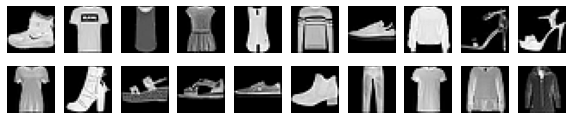

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

fig, axes = plt.subplots(2,10, figsize=(10,2))
ax = axes.ravel()
for i in range(20):
    ax[i].imshow(x_train[i], cmap="gray")
    ax[i].axis('off')
    
img_lin, img_col = x_train.shape[1], x_train.shape[2]
num_classes = len(np.unique(y_train))
print(x_train.shape)
print('Classes: ', num_classes)

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# verifica se as imagens da base de dados tem um canal (i.e. em tons de cinza)
# ou mais do que um canal e se houver mais do que um canal entao armazena a
# quantidade de canais
if (len(x_train.shape) == 3):
      n_channels = 1
else:
      n_channels = x_train.shape[3]

# re-formatando as imagens de forma que sejam transformadas em 
# matrizes com canais (por exemplo quando as imagens sao RGB)
if keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], n_channels, img_lin, img_col)
    x_test = x_test.reshape(x_test.shape[0], n_channels, img_lin, img_col)
    input_shape = (n_channels, img_lin, img_col)
else:
    x_train = x_train.reshape(x_train.shape[0], img_lin, img_col, n_channels)
    x_test = x_test.reshape(x_test.shape[0], img_lin, img_col, n_channels)
    input_shape = (img_lin, img_col, n_channels)

In [3]:
modelC = keras.Sequential()
modelC.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu', input_shape=(img_lin, img_col,1)))
modelC.add(keras.layers.Conv2D(64, kernel_size=(1,3), strides=(1,2), padding='same', activation='relu'))
modelC.add(keras.layers.Conv2D(64, kernel_size=(3,1), strides=(2,1),  padding='same', activation='relu'))
modelC.add(keras.layers.Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
modelC.add(keras.layers.GlobalAveragePooling2D())
modelC.add(tf.keras.layers.Dense(10, activation='softmax'))
modelC.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 7, 64)         6208      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          12352     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
global_average_pooling2d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 94,026
Trainable params: 94,026
Non-trainable params: 0
__________________________________________________

---

### Questão 5)

Defina as sementes aleatórias do numpy para 1 e do tensorflow para 2. Depois, utilizando a arquitetura definida no exercício anterior, configure a rede para treinar com a configuração abaixo, salvando o histórico da perda e acurácia para as épocas.
* otimizador: SGD
* taxa de aprendizado: 0.09
* função de custo: `categorical_crossentropy`
* métrica: `accuracy`
* épocas: 15
* batchsize: 64

Após o processo de aprendizado, obtenha a acurácia calculada no conjunto de treinamento e no conjunto de testes utilizando a função `evaluate()` e escolha a opção cujo intervalo se enquadre nos valores obtidos.

(a) Acurácia Treinamento = (0.92, 0.95),  Acurácia Teste = (0.90, 0.93)<br>
(b) Acurácia Treinamento = (0.86, 0.90),  Acurácia Teste = (0.80, 0.83)<br>
(c) Acurácia Treinamento = (0.96, 1.00),  Acurácia Teste = (0.83, 0.89)<br>
<font color='red'>(d) Acurácia Treinamento = (0.87, 0.92),  Acurácia Teste = (0.84, 0.89)<br></font>

**Justificativa:** ver código abaixo

In [4]:
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)

modelC.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(lr=0.09),
              metrics=['accuracy'])

In [5]:
batch_size = 64
epochs = 15

# a variável history guarda os dados do processo de treinamento para
# posteriormente analisarmos
history = modelC.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs, verbose=1)

Epoch 1/15
938/938 [==============================] - 24s 26ms/step - loss: 1.0803 - accuracy: 0.5929
Epoch 2/15
938/938 [==============================] - 31s 33ms/step - loss: 0.6400 - accuracy: 0.7615
Epoch 3/15
938/938 [==============================] - 36s 39ms/step - loss: 0.5373 - accuracy: 0.8039
Epoch 4/15
938/938 [==============================] - 36s 38ms/step - loss: 0.4717 - accuracy: 0.8292
Epoch 5/15
938/938 [==============================] - 38s 41ms/step - loss: 0.4319 - accuracy: 0.8449
Epoch 6/15
938/938 [==============================] - 37s 40ms/step - loss: 0.4011 - accuracy: 0.8564
Epoch 7/15
938/938 [==============================] - 50s 54ms/step - loss: 0.3778 - accuracy: 0.8642
Epoch 8/15
938/938 [==============================] - 64s 69ms/step - loss: 0.3621 - accuracy: 0.8693
Epoch 9/15
938/938 [==============================] - 49s 52ms/step - loss: 0.3461 - accuracy: 0.8755
Epoch 10/15
938/938 [==============================] - 46s 49ms/step - loss: 0.334

In [6]:
scoreTr = modelC.evaluate(x_train, y_train, verbose = 0)
scoreTe = modelC.evaluate(x_test, y_test, verbose = 0)
print("Acurácia treinamento: %.4f" % (scoreTr[1]))
print("Acurácia teste: %.4f" % (scoreTe[1]))

Acurácia treinamento: 0.8858
Acurácia teste: 0.8693
